# 3. Polynomial Regression


### 공부시간에 따른 시험점수(우등생)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../dataset/PolynomialRegressionData.csv')

In [5]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

### 3-1 단순선형회귀(SLR)

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y) # 전체데이터 학습

LinearRegression()

### 데이터 시각화(전체)

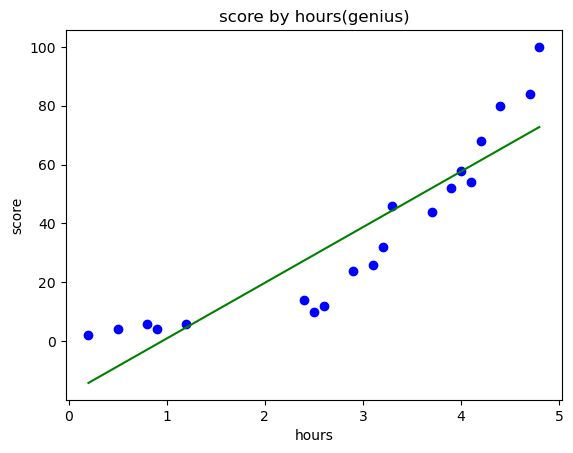

In [10]:
plt.scatter(X,y, color='blue') #산점도
plt.plot(X, reg.predict(X), color='green')
plt.title('score by hours(genius)') #제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show()


In [11]:
#전체데이터를 통한 모델 평가
reg.score(X,y)

0.8169296513411765